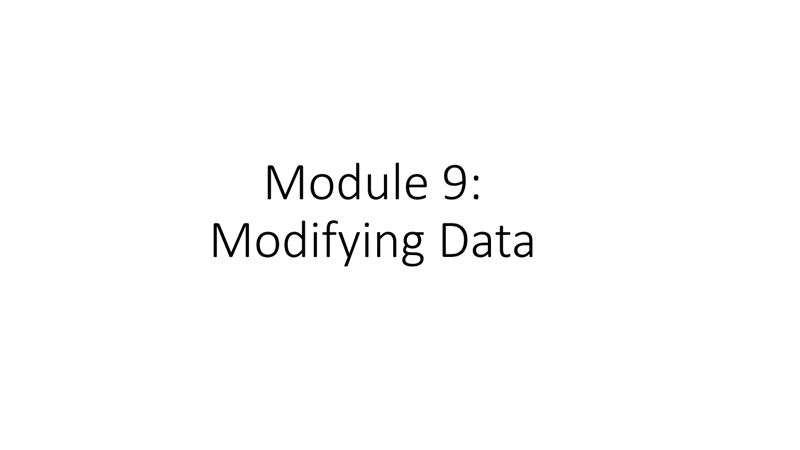

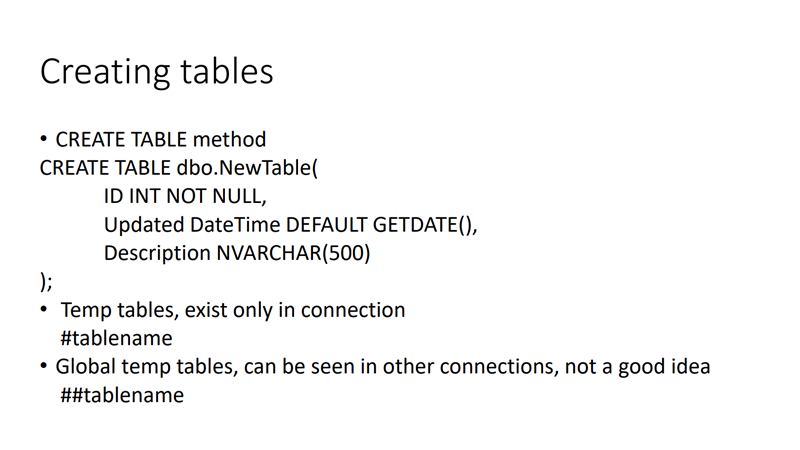

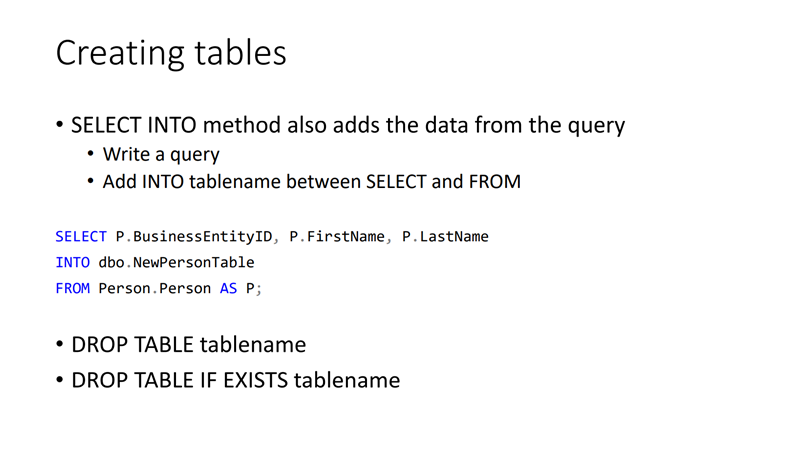

In [2]:
--Demo 1 Script to create a table
USE AdventureWorks2019;
GO
--2016 syntax
DROP TABLE IF EXISTS dbo.demoCustomer;
/*
--pre-2016 way to check for table existence and drop table
IF EXISTS (SELECT * FROM sys.objects
            WHERE object_id = OBJECT_ID(N'[dbo].[demoCustomer]')
                AND type in (N'U'))
    DROP TABLE dbo.demoCustomer;

*/
CREATE TABLE dbo.demoCustomer(CustomerID INT NOT NULL,
    FirstName NVARCHAR(50) NOT NULL, MiddleName NVARCHAR(50) NULL,
    LastName NVARCHAR(50) NOT NULL
    CONSTRAINT PK_demoCustomer PRIMARY KEY (CustomerID)); 

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.405

In [ ]:
--Create tables with SELECT INTO
DROP TABLE IF EXISTS [dbo].[demoProduct];
GO
 
SELECT * INTO dbo.demoProduct FROM Production.Product;
 
DROP TABLE IF EXISTS [dbo].[demoCustomer];
GO
SELECT C.*, LastName, FirstName 
INTO dbo.demoCustomer
FROM Sales.Customer AS C
JOIN Person.Person AS P ON C.CustomerID = P.BusinessEntityID;

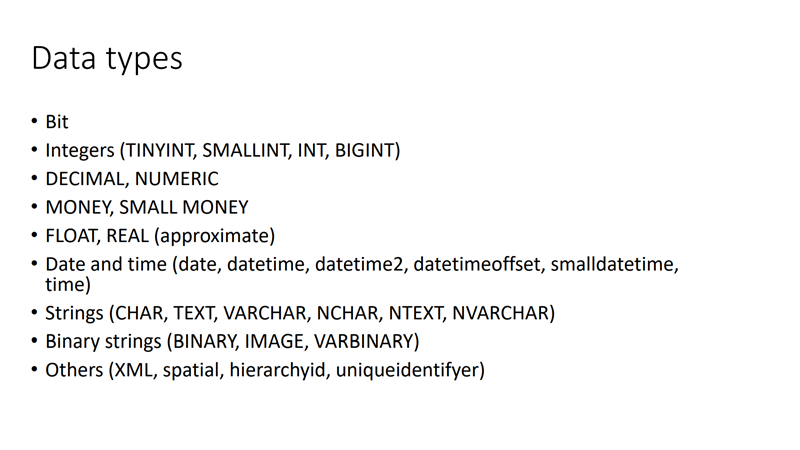

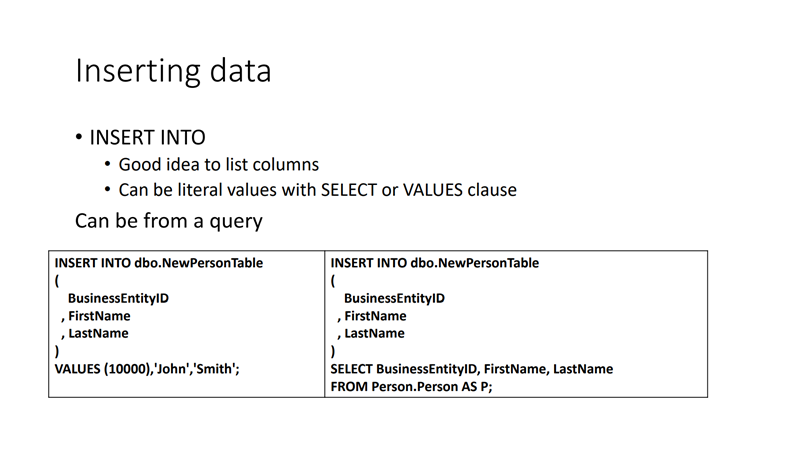

\--Adding One Row at a Time with Literal Values

\--1

INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)

VALUES (1, N'Orlando', N'N.', N'Gee');

\--2

INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)

SELECT 3, N'Donna', N'F.', N'Cameras';

\--3

INSERT INTO dbo.demoCustomer

VALUES (4,N'Janet', N'M.', N'Gates');

\--4

INSERT INTO dbo.demoCustomer

SELECT 6,N'Rosmarie', N'J.', N'Carroll';

\--5

INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)

VALUES (2, N'Keith', NULL, N'Harris');

\--6

INSERT INTO dbo.demoCustomer (CustomerID, FirstName, LastName)

VALUES (5, N'Lucy', N'Harrington');

In [ ]:
--Attempting to Insert Rows with Invalid INSERT Statements
PRINT '1';
--1
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
VALUES (1, N'Dominic', N'P.', N'Gash');
 
PRINT '2';
--2
INSERT INTO dbo.demoCustomer (CustomerID, MiddleName, LastName)
VALUES (10, N'M.', N'Garza');
 
GO
PRINT '3';
GO
 

In [ ]:
--Inserting Multiple Rows with One INSERT
--1
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
SELECT 7, N'Dominic', N'P.', N'Gash'
UNION ALL
SELECT 10, N'Kathleen', N'M.', N'Garza'
UNION ALL
SELECT 11, N'Katherine', NULL, N'Harding';
 
--2
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
VALUES (12, N'Johnny', N'A.', N'Capino'),
       (16, N'Christopher', N'R.', N'Beck'),
       (18, N'David', N'J.', N'Liu');
 
--3
SELECT CustomerID, FirstName, MiddleName, LastName
FROM dbo.demoCustomer
WHERE CustomerID >=7;

In [ ]:
--Inserting Rows from Another Table
--1
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE BusinessEntityID BETWEEN 19 AND 35;
--2
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
SELECT DISTINCT s.SalesOrderID, c.FirstName, c.MiddleName, c.LastName
FROM Person.Person AS c
INNER JOIN Sales.SalesOrderHeader AS s ON c.BusinessEntityID = s.SalesPersonID;

SELECT CustomerID, FirstName, MiddleName, LastName
FROM dbo.demoCustomer
WHERE CustomerID > 18;

In [ ]:
--Inserting Missing Rows
--1
SELECT COUNT(CustomerID) AS CustomerCount
FROM dbo.demoCustomer;
 
--2
INSERT INTO dbo.demoCustomer (CustomerID, FirstName, MiddleName, LastName)
SELECT c.BusinessEntityID, c.FirstName, c.MiddleName, c.LastName
FROM Person.Person AS c
WHERE NOT EXISTS (
    SELECT 1 FROM dbo.demoCustomer a
    WHERE a.CustomerID = c.BusinessEntityID);
 
--3
SELECT COUNT(CustomerID) AS CustomerCount
FROM dbo.demoCustomer;

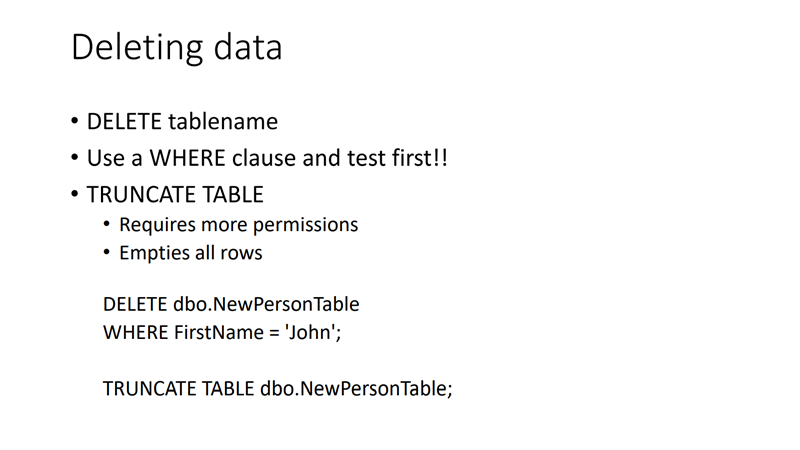

In [ ]:
--Listing 10-11. Deleting Rows from Tables
--1
SELECT CustomerID
FROM dbo.demoCustomer;
 
--2
DELETE dbo.demoCustomer;
 
--3
SELECT CustomerID
FROM dbo.demoCustomer;
 

In [ ]:
--4
SELECT ProductID
FROM dbo.demoProduct
WHERE ProductID > 900;
 
--5
DELETE dbo.demoProduct
WHERE ProductID > 900;
 
--6
SELECT ProductID
FROM dbo.demoProduct
WHERE ProductID > 900;


In [ ]:
--Listing 10-12. Deleting as part of a JOIN
--1
DROP TABLE IF EXISTS dbo.demoSalesOrderDetail;
DROP TABLE IF EXISTS dbo.demoSalesOrderHeader;

SELECT * INTO dbo.demoSalesOrderDetail 
FROM Sales.SalesOrderHeader;
SELECT * INTO dbo.demosSalesOrderHeader
FROM Sales.SalesOrderDetail;

SELECT d.SalesOrderID, SalesOrderNumber
FROM dbo.demoSalesOrderDetail AS d
INNER JOIN dbo.demoSalesOrderHeader 
AS h ON d.SalesOrderID = h.SalesOrderID
WHERE h.SalesOrderNumber = 'SO71797';
 
--2
DELETE d
FROM dbo.demoSalesOrderDetail AS d
INNER JOIN dbo.demoSalesOrderHeader 
AS h ON d.SalesOrderID = h.SalesOrderID
WHERE h.SalesOrderNumber = 'SO71797'; 

--3
SELECT d.SalesOrderID, SalesOrderNumber
FROM dbo.demoSalesOrderDetail AS d
INNER JOIN dbo.demoSalesOrderHeader 
AS h ON d.SalesOrderID = h.SalesOrderID
WHERE h.SalesOrderNumber = 'SO71797';
 

In [ ]:
--4
SELECT SalesOrderID, ProductID
FROM dbo.demoSalesOrderDetail AS SOD
WHERE NOT EXISTS
    (SELECT *
         FROM dbo.demoProduct AS P
         WHERE P.ProductID = SOD.ProductID);
--5
DELETE SOD
FROM dbo.demoSalesOrderDetail AS SOD
WHERE NOT EXISTS
    (SELECT *
         FROM dbo.demoProduct AS P
         WHERE P.ProductID = SOD.ProductID);
 
--6
SELECT SalesOrderID, ProductID
FROM dbo.demoSalesOrderDetail AS SOD
WHERE NOT EXISTS
    (SELECT *
         FROM dbo.demoProduct AS P
         WHERE P.ProductID = SOD.ProductID); 

In [ ]:
TRUNCATE TABLE dbo.demoSalesOrderHeader;

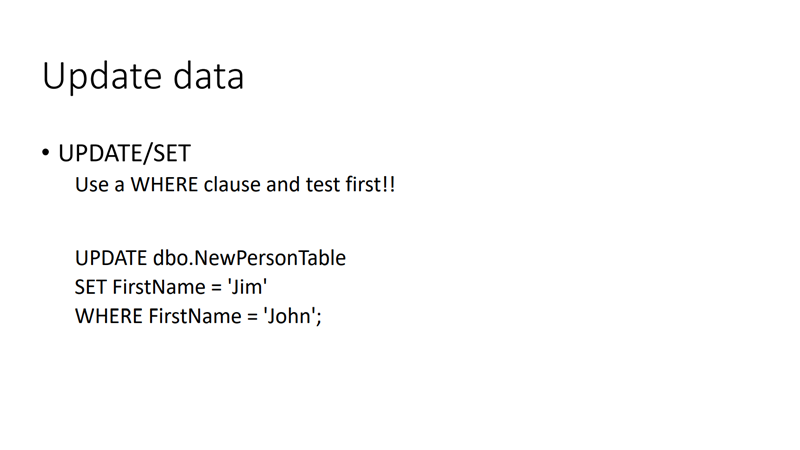

In [3]:
DROP TABLE IF EXISTS dbo.demoCustomer;
SELECT BusinessEntityID, FirstName, MiddleName, LastName INTO dbo.DemoCustomer
FROM Person.Person
WHERE BusinessEntityID BETWEEN 19 AND 35;


 

(17 rows affected)

Total execution time: 00:00:00.180

In [4]:
SELECT * 
FROM dbo.demoCustomer
WHERE BusinessEntityID = 19;

UPDATE dbo.DemoCustomer 
SET FirstName = 'John', LastName = 'Smith'
WHERE BusinessEntityID = 19;

SELECT * 
FROM dbo.demoCustomer;

(1 row affected)

Total execution time: 00:00:00.013

In [5]:
USE AdventureWorks2019;
GO
DROP TABLE IF EXISTS dbo.DemoAddress;
SELECT * INTO dbo.DemoAddress 
FROM Person.Address;

SELECT AddressLine1, AddressLine2
FROM dbo.demoAddress;

SELECT  P.FirstName + ' ' + P.LastName,
    AddressLine2 = AddressLine1 + ISNULL(' ' + AddressLine2,'')
FROM dbo.demoAddress AS dA
INNER JOIN Person.BusinessEntityAddress BEA ON dA.AddressID = BEA.AddressID
INNER JOIN Person.Person P ON P.BusinessEntityID = BEA.BusinessEntityID;
 

UPDATE dA
SET AddressLine1 = P.FirstName + ' ' + P.LastName,
    AddressLine2 = AddressLine1 + ISNULL(' ' + AddressLine2,'')
FROM dbo.demoAddress AS dA
INNER JOIN Person.BusinessEntityAddress BEA ON dA.AddressID = BEA.AddressID
INNER JOIN Person.Person P ON P.BusinessEntityID = BEA.BusinessEntityID;

SELECT AddressLine1, AddressLine2
FROM dbo.demoAddress;
 




Commands completed successfully.

(19614 rows affected)

(19614 rows affected)

(18798 rows affected)

(18798 rows affected)

(19614 rows affected)

Displaying Top 5000 rows.

Displaying Top 5000 rows.

Displaying Top 5000 rows.

Total execution time: 00:00:00.898

AddressLine1 AddressLine2 1970 Napa Ct. NULL 9833 Mt. Dias Blv. NULL 7484 Roundtree Drive NULL 9539 Glenside Dr NULL 1226 Shoe St. NULL 1399 Firestone Drive NULL 5672 Hale Dr. NULL 6387 Scenic Avenue NULL 8713 Yosemite Ct. NULL 250 Race Court NULL 1318 Lasalle Street NULL 5415 San Gabriel Dr. NULL 9265 La Paz NULL 8157 W. Book NULL 4912 La Vuelta NULL 40 Ellis St. NULL 6696 Anchor Drive NULL 1873 Lion Circle NULL 3148 Rose Street NULL 6872 Thornwood Dr. NULL 5747 Shirley Drive NULL 636 Vine Hill Way NULL 6657 Sand Pointe Lane NULL 80 Sunview Terrace NULL 9178 Jumping St. NULL 5725 Glaze Drive NULL 2487 Riverside Drive NULL 9228 Via Del Sol NULL 8291 Crossbow Way NULL 9707 Coldwater Drive NULL 9100 Sheppard Avenue North NULL 26910 Indela Road NULL 10203 Acorn Avenue NULL 94, rue Descartes NULL Pascalstr 951 NULL 34 Waterloo Road NULL Downshire Way NULL 8154 Via Mexico NULL 3997 Via De Luna NULL 1902 Santa Cruz NULL 793 Crawford Street NULL 463 H Stagecoach Rd. NULL 5203 Virginia Lane NULL 4095 Cooper Dr. NULL 6697 Ridge Park Drive NULL 5669 Ironwood Way NULL 8192 Seagull Court NULL 5553 Cash Avenue NULL 7048 Laurel NULL 25 95th Ave NE NULL 3280 Pheasant Circle NULL 4231 Spar Court NULL 1285 Greenbrier Street NULL 5724 Victory Lane NULL 591 Merriewood Drive NULL 3114 Notre Dame Ave. NULL 7230 Vine Maple Street NULL 2601 Cambridge Drive NULL 2115 Passing NULL 4852 Chaparral Court NULL Lakewood Mall NULL Oxnard Outlet NULL Vista Marketplace NULL Sports Store At Park City NULL North County Square NULL 123 Camelia Avenue NULL Mountain Square NULL Fox Hills NULL Parkway Plaza NULL Stonewood Mall NULL Hanford Mall NULL Ontario Mills NULL Nut Tree Factory NULL Rocky Mountain Pines Outlet NULL Stevens Creek Shopping Center NULL Factory Merchants NULL The Citadel Commerce Plaza NULL University Town Center NULL Pavillion @ Redlands NULL San Diego Factory NULL Pacific West Outlet NULL Belz Factory Outlet NULL Camarillo Athletic Stores NULL Lake Elisnor Place NULL Norwalk Square NULL Riverside NULL The Quad @ WestView NULL Arcadia Crossing NULL Eastern Beltway Center NULL Factory Stores/tucson NULL Viejas Outlet Center NULL West Park Plaza NULL Factory Stores Of America NULL Prime Outlets NULL Bayshore Mall NULL 7709 West Virginia Avenue NULL 6900 Sisk Road NULL 3250 Baldwin Park Blvd NULL 5867 Sunrise Boulevard NULL 6500 East Grant Road NULL 3065 Santa Margarita Parkway NULL 9920 Bridgepointe Parkway NULL 5525 South Hover Road NULL 8525 South Parker Road NULL 7505 Laguna Boulevard NULL 9909 W. Ventura Boulevard NULL 25150 El Camino Real NULL 2575 Rocky Mountain Ave. NULL 25871 North Main Street NULL 2551 East Warner Road NULL 22589 West Craig Road NULL 25751 University Drive NULL 49925 Crestview Drive N.E. NULL 57251 Serene Blvd NULL 253731 West Bell Road NULL 99040 California Avenue NULL 25620 Firestone Boulevard NULL 3800 Breck Court # 60 9649 Sequoia Woods Pl. NULL 1907 Grand Ct. NULL 1640 Windmill Way NULL 8713 Book Street NULL 8245 Heartwood Drive NULL 3413 Sequoia Woods Pl. NULL 3200 Wren Ave. #107 1277 Army Dr. NULL 1318 Nottingham Pl. NULL 3535 Hillview Dr. NULL 111, boulevard du Montparnasse NULL 2305 Glaze Drive NULL 6501 West Way NULL 7874 Jones Lane NULL 3187 Westwood Court #71 Kalkweg 4 NULL Winter der Böck 8456 NULL 6863 Shakespeare Dr NULL 7650 Northridge Drive NULL 4019 Shadow Lane NULL 2128, place du Tertre NULL Marketplatz 5193 NULL 5485 Wee Donegal # 77 5300 Turning Dr. NULL 214 Via Del Sol NULL 9746 Valley Blvd. NULL 9466 Morning Glory Dr. NULL 7569 Mt. Everest Court NULL 9080, quai de Grenelle NULL 7355 San Benito NULL 872 Patterson Blvd. NULL 2777 Spring Hill Drive NULL 5473 Hillridge Way NULL 4082 Roslyn Road NULL 3805 Brushcreek Court NULL 36, avenue Reille NULL Königstr 387 NULL 13, rue de Terre Neuve NULL 118, rue Marbeuf NULL Hauptstr 2929 NULL 369 Roslyn Drive NULL 7996 Ronda Ct. NULL 76, rue des Berges NULL 1201 Olive Hill NULL 2697 Hobby Court NULL 6490 El Camino NULL 6155 Wilbur Drive NULL 561 Park Glenn NULL

(No column name) AddressLine2 Thierry D'Hers 1970 Napa Ct. Vamsi Kuppa 9833 Mt. Dias Blv. Syed Abbas 7484 Roundtree Drive Mikael Sandberg 9539 Glenside Dr Kim Ralls 1226 Shoe St. Belinda Newman 1399 Firestone Drive Betsy Stadick 5672 Hale Dr. Bob Hohman 6387 Scenic Avenue Peng Wu 250 Race Court Calvin Raji 5415 San Gabriel Dr. Karen Wu 9265 La Paz Brian Goldstein 8157 W. Book Karl Xie 4912 La Vuelta Jonathan Jackson 40 Ellis St. Miguel Miller 6696 Anchor Drive Osarumwense Agbonile 1873 Lion Circle Julia Lee 3148 Rose Street Carol Philips 6872 Thornwood Dr. Chad Niswonger 5747 Shirley Drive Pamela Ansman-Wolfe 636 Vine Hill Way Chris Preston 6657 Sand Pointe Lane Jillian Carson 80 Sunview Terrace Shu Ito 5725 Glaze Drive Linda Mitchell 2487 Riverside Drive Tsvi Reiter 8291 Crossbow Way José Saraiva 9100 Sheppard Avenue North Garrett Vargas 10203 Acorn Avenue Ranjit Varkey Chudukatil 94, rue Descartes Rachel Valdez Pascalstr 951 Lynn Tsoflias 34 Waterloo Road Jae Pak Downshire Way Michael Blythe 8154 Via Mexico Tete Mensa-Annan 3997 Via De Luna Christopher Hill 1902 Santa Cruz Jose Hayes 793 Crawford Street Cynthia Randall 463 H Stagecoach Rd. Danielle Tiedt 5203 Virginia Lane David Hamilton 4095 Cooper Dr. David Johnson 6697 Ridge Park Drive Denise Smith 5669 Ironwood Way Diane Tibbott 8192 Seagull Court Doris Hartwig 5553 Cash Avenue Dylan Miller 7048 Laurel Alan Brewer 25 95th Ave NE Alice Ciccu 3280 Pheasant Circle Benjamin Martin 4231 Spar Court Fadi Fakhouri 1285 Greenbrier Street Frank Martinez 5724 Victory Lane Frank Miller 591 Merriewood Drive Barry Johnson 3114 Notre Dame Ave. Brian Lloyd 7230 Vine Maple Street Fred Northup 2601 Cambridge Drive Garrett Young 2115 Passing Bonnie Kearney 4852 Chaparral Court Natalie Ward 3800 Breck Court # 60 Max Blanco 9649 Sequoia Woods Pl. Kelvin Yuan 1907 Grand Ct. Max Serrano 1640 Windmill Way Natalie Torres 8713 Book Street Natalie Peterson 8245 Heartwood Drive Natalie Gray 3413 Sequoia Woods Pl. Natalie Ramirez 3200 Wren Ave. #107 Natalie James 1277 Army Dr. Natalie Watson 1318 Nottingham Pl. Max Suarez 3535 Hillview Dr. Max Sanz 111, boulevard du Montparnasse Natalie Brooks 2305 Glaze Drive Natalie Kelly 6501 West Way Max Rubio 7874 Jones Lane Max Ortega 3187 Westwood Court #71 Natalie Sanders Kalkweg 4 Andy Martin Winter der Böck 8456 Andy Gomez 6863 Shakespeare Dr Natalie Barnes 7650 Northridge Drive Natalie Ross 4019 Shadow Lane Natalie Henderson 2128, place du Tertre Andy Diaz Marketplatz 5193 Andy Hernandez 5485 Wee Donegal # 77 Natalie Coleman 5300 Turning Dr. Natalie Jenkins 214 Via Del Sol Natalie Perry 9746 Valley Blvd. Andy Alvarez 9466 Morning Glory Dr. Natalie Powell 7569 Mt. Everest Court Andy Jiménez 9080, quai de Grenelle Natalie Long 7355 San Benito Andy Munoz 872 Patterson Blvd. Natalie Patterson 2777 Spring Hill Drive Natalie Hughes 5473 Hillridge Way Andy Alonso 4082 Roslyn Road Natalie Flores 3805 Brushcreek Court Andy Romero 36, avenue Reille Andy Navarro Königstr 387 Andy Gutierrez 13, rue de Terre Neuve Kelvin Lal 118, rue Marbeuf Andy Torres Hauptstr 2929 Andy Dominguez 369 Roslyn Drive Natalie Butler 7996 Ronda Ct. Andy Gill 76, rue des Berges Natalie Simmons 1201 Olive Hill Natalie Foster 2697 Hobby Court Andy Vazquez 6490 El Camino Natalie Gonzales 6155 Wilbur Drive Natalie Bryant 561 Park Glenn Natalie Alexander 6928 N. 8th Street Andy Blanco 1, rue de la Centenaire Natalie Russell 8932 Westwood Way Andy Serrano 62, route de Marseille Natalie Griffin 8210 Mines Road Natalie Diaz 3124 Fall Creek Alexandra Stewart 5935 Isabel Alexandra Sanchez 3758 Springwood Way Hailey Diaz 9063 Vista Aven. Maria Stewart 14 Delta Road Maria Morris 3, rue Surcouf Maria Rogers 7954 Monument Blvd Kaitlin Schmidt 7886 Burwood Way Maria Reed 1413 Bridgeview St Maria Cook 5818 San Rafael Kaitlin Rana 40, rue de la Centenaire Kaitlin Raman Wasserstr 63 Maria Morgan 2187 S. Rising Ave Maria Blue 4190 Trujillo Maria Murphy 3469 Relief Valley Ct. # 22 Maria Bailey 8381 Lake Place

AddressLine1 AddressLine2 Thierry D'Hers 1970 Napa Ct. Vamsi Kuppa 9833 Mt. Dias Blv. Syed Abbas 7484 Roundtree Drive Mikael Sandberg 9539 Glenside Dr Kim Ralls 1226 Shoe St. Belinda Newman 1399 Firestone Drive Betsy Stadick 5672 Hale Dr. Bob Hohman 6387 Scenic Avenue 8713 Yosemite Ct. NULL Peng Wu 250 Race Court 1318 Lasalle Street NULL Calvin Raji 5415 San Gabriel Dr. Karen Wu 9265 La Paz Brian Goldstein 8157 W. Book Karl Xie 4912 La Vuelta Jonathan Jackson 40 Ellis St. Miguel Miller 6696 Anchor Drive Osarumwense Agbonile 1873 Lion Circle Julia Lee 3148 Rose Street Carol Philips 6872 Thornwood Dr. Chad Niswonger 5747 Shirley Drive Pamela Ansman-Wolfe 636 Vine Hill Way Chris Preston 6657 Sand Pointe Lane Jillian Carson 80 Sunview Terrace 9178 Jumping St. NULL Shu Ito 5725 Glaze Drive Linda Mitchell 2487 Riverside Drive 9228 Via Del Sol NULL Tsvi Reiter 8291 Crossbow Way 9707 Coldwater Drive NULL José Saraiva 9100 Sheppard Avenue North 26910 Indela Road NULL Garrett Vargas 10203 Acorn Avenue Ranjit Varkey Chudukatil 94, rue Descartes Rachel Valdez Pascalstr 951 Lynn Tsoflias 34 Waterloo Road Jae Pak Downshire Way Michael Blythe 8154 Via Mexico Tete Mensa-Annan 3997 Via De Luna Christopher Hill 1902 Santa Cruz Jose Hayes 793 Crawford Street Cynthia Randall 463 H Stagecoach Rd. Danielle Tiedt 5203 Virginia Lane David Hamilton 4095 Cooper Dr. David Johnson 6697 Ridge Park Drive Denise Smith 5669 Ironwood Way Diane Tibbott 8192 Seagull Court Doris Hartwig 5553 Cash Avenue Dylan Miller 7048 Laurel Alan Brewer 25 95th Ave NE Alice Ciccu 3280 Pheasant Circle Benjamin Martin 4231 Spar Court Fadi Fakhouri 1285 Greenbrier Street Frank Martinez 5724 Victory Lane Frank Miller 591 Merriewood Drive Barry Johnson 3114 Notre Dame Ave. Brian Lloyd 7230 Vine Maple Street Fred Northup 2601 Cambridge Drive Garrett Young 2115 Passing Bonnie Kearney 4852 Chaparral Court Lakewood Mall NULL Oxnard Outlet NULL Vista Marketplace NULL Sports Store At Park City NULL North County Square NULL 123 Camelia Avenue NULL Mountain Square NULL Fox Hills NULL Parkway Plaza NULL Stonewood Mall NULL Hanford Mall NULL Ontario Mills NULL Nut Tree Factory NULL Rocky Mountain Pines Outlet NULL Stevens Creek Shopping Center NULL Factory Merchants NULL The Citadel Commerce Plaza NULL University Town Center NULL Pavillion @ Redlands NULL San Diego Factory NULL Pacific West Outlet NULL Belz Factory Outlet NULL Camarillo Athletic Stores NULL Lake Elisnor Place NULL Norwalk Square NULL Riverside NULL The Quad @ WestView NULL Arcadia Crossing NULL Eastern Beltway Center NULL Factory Stores/tucson NULL Viejas Outlet Center NULL West Park Plaza NULL Factory Stores Of America NULL Prime Outlets NULL Bayshore Mall NULL 7709 West Virginia Avenue NULL 6900 Sisk Road NULL 3250 Baldwin Park Blvd NULL 5867 Sunrise Boulevard NULL 6500 East Grant Road NULL 3065 Santa Margarita Parkway NULL 9920 Bridgepointe Parkway NULL 5525 South Hover Road NULL 8525 South Parker Road NULL 7505 Laguna Boulevard NULL 9909 W. Ventura Boulevard NULL 25150 El Camino Real NULL 2575 Rocky Mountain Ave. NULL 25871 North Main Street NULL 2551 East Warner Road NULL 22589 West Craig Road NULL 25751 University Drive NULL 49925 Crestview Drive N.E. NULL 57251 Serene Blvd NULL 253731 West Bell Road NULL 99040 California Avenue NULL 25620 Firestone Boulevard NULL Natalie Ward 3800 Breck Court # 60 Max Blanco 9649 Sequoia Woods Pl. Kelvin Yuan 1907 Grand Ct. Max Serrano 1640 Windmill Way Natalie Torres 8713 Book Street Natalie Peterson 8245 Heartwood Drive Natalie Gray 3413 Sequoia Woods Pl. Natalie Ramirez 3200 Wren Ave. #107 Natalie James 1277 Army Dr. Natalie Watson 1318 Nottingham Pl. Max Suarez 3535 Hillview Dr. Max Sanz 111, boulevard du Montparnasse Natalie Brooks 2305 Glaze Drive Natalie Kelly 6501 West Way Max Rubio 7874 Jones Lane Max Ortega 3187 Westwood Court #71 Natalie Sanders Kalkweg 4 Andy Martin Winter der Böck 8456 Andy Gomez 6863 Shakespeare Dr Natalie Barnes 7650 Northridge Drive Natalie Ross 4019 